postion of channel:

top: $z>=2, z<9$

middle: $z>=-4, z<2$

bottom: $z>=-10, z<-4$

### statistical analysis

Calculate the average of movement changes of particles from channel 1 according to x, y, z direction.

Plotting the result for channel 1

Plotting the result for channel 2

### Identify each particle in the tunnel

### Statistical analysis

for P1 in chanel 1:

t1: $x_1^2$ - $x_1^1$

t2: $x_1^3$ - $x_1^2$

......

t23: $x_1^{24}$ - $x_1^{23}$

for P2 in chanel 1:

t1: $x_2^2$ - $x_2^1$

t2: $x_2^3$ - $x_2^2$

......

t23: $x_2^{24}$ - $x_2^{23}$

total movement change from t1 to t2 in x direction:

$ave = (x_1^2 - x_1^1)+(x_2^2 - x_2^1)+...+(x_{17}^2 - x_{17}^1)$

$ = (x_1^2 + x_2^2 + ... + x_{17}^2) - (x_1^1 + x_2^1 + ... + x_{17}^1)$
(here we only assume we have 17 particles)

# 07.21

### Get position list of particles in path file
According to the number of occurrences of phrase "eof" in file, we can get the frame number (timestep) and position number (the end of each frame number), and then get the position list arranged according to these two parameters.

In [1]:
#find number of frames appeared in path files
def findframe(path):
    with open(path,'r', encoding='utf-8', errors='ignore') as f:
        totalFrames = 0
        line_num = 0
        pos = []
        search_phrase = "eof"

        while True:
            line = f.readline()  
            line_num += 1
    
            if line.find(search_phrase) >= 0:
                pos.append(line_num)
                totalFrames += 1 
                    
            if not line:
                break
    return(totalFrames)

In [2]:
#find line number for the end of each frames
def findPOS(path):
    with open(path,'r', encoding='utf-8', errors='ignore') as f:
        count = 0
        pos = []
        search_phrase = "eof"

        for line in f.readlines():
            count += 1
            if line.find(search_phrase) >= 0:
                pos.append(count)
    return(pos[0])

In [3]:
#get particle position list and arrange them into arrays according to their frames
def findList(path, totalFrames,pos):
    line_num = 0
    positionsList = []
    data = []
    for i in range(totalFrames):
                positionsList.append([]) 
    with open(path,'r', encoding='utf-8', errors='ignore') as f:
        while True:
            line = f.readline()  
            line_str = line.strip('\n')
            data = line_str.split(" ")
            line_num += 1 
            for j in range(totalFrames):
                if line_num>pos*j and line_num<pos*(j+1):
                    if data[0] == "sphere":
                        positionsList[j].append(list(data))     
            if not line:
                break
    return(positionsList)

### Identify each particle in the tunnel
1. According to RDF, only the distance between particles 1 and another particle is lower than rcutAvg=1.1, we can possibly define particle 1 as channel particle. Besides, channel particles should be small particles (the color of particle should be "33ff99")
2. We need to identify channel particles into three different zones and marked them with different color. To achieve that, the positions of particles in positionList are classified and arranged into other three arrays, i.e., top[], middle[] and bottom[]. And we change the color of channel particles by search those three arrays in data[], if find then the color is changed.

In [4]:
# define particles in the channel and arrange them into arrays
def findChanel(positionsList,totalFrames):
    import math
    chanel          = []
    # zoneXY_1x = [-2.4,2.4]
    # zoneXY_1y = [-1.8,1.8]
    for t in range(totalFrames):
        chanel.append([])
    for n in range(totalFrames):
        for i in range(len(positionsList[n])):
            for j in range(len(positionsList[n])):
                if (i == j): continue
                rcutAvg = 1.1
                dx = float(positionsList[n][i][3]) - float(positionsList[n][j][3])
                dy = float(positionsList[n][i][4]) - float(positionsList[n][j][4])
                dz = float(positionsList[n][i][5]) - float(positionsList[n][j][5])
                normFactor = math.sqrt(dx*dx + dy*dy + dz*dz) 
                if (normFactor<=rcutAvg and positionsList[n][i][2] == "33ff99"):
                    chanel[n].append(positionsList[n][i][3:])
                    break
                
    return(chanel)

In [5]:
#get name of current path file
def findName(path):
    import sys
    import os
    with open(path) as file:
        filename = os.path.basename(file.name)
    return(filename)

In [6]:
#identify particles into top,middle and bottom zones
def Identify(path,filename,top,middle,bottom):
    file_data = ""
    with open(path) as f:
        while True:
            line = f.readline()
            line_data = line.strip('\n')
            if not line:
                break
            data = line_data.split(" ")
            
            for i in range(len(top)):
                if data[3:] in top[i]:
                    line = line.replace(data[2],"ff3399")
                    # print(line)
            for j in range(len(middle)):
                if data[3:] in middle[j]:
                    line = line.replace(data[2],"ffc080")
            for k in range(len(bottom)):
                if data[3:] in bottom[k]:
                    line = line.replace(data[2],"80ffff")
            
            file_data += line

    with open("/home/tengda/桌面/Diffusion_final/{}".format(filename),'w') as f:
        f.write(file_data) 

### Plot result

In [7]:
def Plot(totalFrames,x,y,z):
    import matplotlib.pyplot as plt
    time = np.linspace(1,totalFrames,totalFrames)
    std1 = np.std(x)
    std2 = np.std(y)
    std3 = np.std(z)
    print(std1)
    plt.figure(1)
    
    plt.errorbar(time[:-1],x,yerr=std1,ms=3,mfc='b',fmt="o-", ecolor='r',color='r',elinewidth=1,capsize=1)
    plt.errorbar(time[:-1],y,yerr=std2,ms=3,mfc='b',fmt="o-", ecolor='y',color='y',elinewidth=1,capsize=1)
    plt.errorbar(time[:-1],z,yerr=std3,ms=3,mfc='b',fmt="o-", ecolor='g',color='g',elinewidth=1,capsize=1)

    plt.xlabel('time')
    plt.ylabel('$\delta$')
    lg=plt.legend(['top','middle','bottom'],title='zone')
    plt.show

### Implementation

Calculate the average of movement changes of particles from channel 1 according to x, y, z direction.

for P1 in chanel 1:
t1: $x_1^2$ - $x_1^1$

t2: $x_1^3$ - $x_1^2$
......
t23: $x_1^{24}$ - $x_1^{23}$

for P2 in chanel 1:
t1: $x_2^2$ - $x_2^1$

t2: $x_2^3$ - $x_2^2$
......
t23: $x_2^{24}$ - $x_2^{23}$

total movement change from t1 to t2 in x direction:
$ave = (x_1^2 - x_1^1)+(x_2^2 - x_2^1)+...+(x_{17}^2 - x_{17}^1)$

$ = (x_1^2 + x_2^2 + ... + x_{17}^2) - (x_1^1 + x_2^1 + ... + x_{17}^1)$

(here we only assume we have 17 particles)

AB7_0.70_1x1x5_rho_0.64_finalDensity.pos
0.011487515996993151


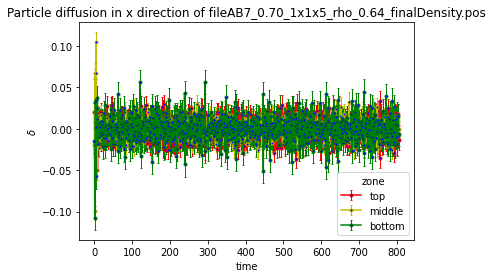

0.008950773503061699


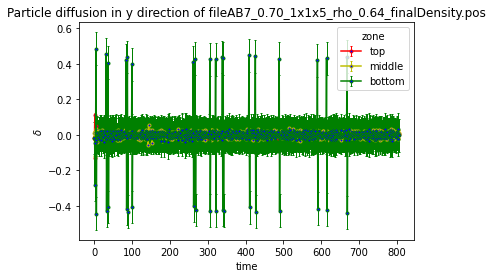

0.0352078612169041


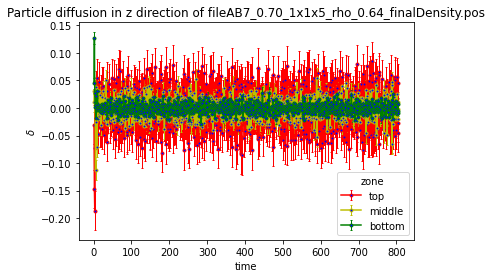

582
584
423
[]
432
[]
433
[]
434
[]
435
[]
436
[]
439
[]
440
[]
443
[]
444
[]
445
[]
446
[]
447
[]
448
[]
488
[]
489
[]
503
[]
504
[]
505
[]
506
[]
507
[]
508
[]
509
[]
513
[]
514
[]
515
[]
516
[]
517
[]
518
[]
519
[]
520
[]
521
[]
522
[]
523
[]
524
[]
525
[]
526
[]
527
[]
528
[]
529
[]
530
[]
531
[]
532
[]
533
[]
534
[]
535
[]
536
[]
537
[]
538
[]
539
[]
540
[]
541
[]
542
[]
545
[]
546
[]
547
[]
548
[]
549
[]
550
[]
551
[]
552
[]
553
[]
554
[]
555
[]
556
[]
557
[]
558
[]
562
[]
563
[]
564
[]
AB7_0.58_1x1x5_rho_0.64_finalDensity.pos
423
432
433
434
435
436
439
440
443
444
445
446
447
448
488
489
503
504
505
506
507
508
509
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
545
546
547
548
549
550
551
552
553
554
555
556
557
558
562
563
564


/home/tengda/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [9]:
import os
import math
import numpy as np
import sys
import matplotlib.pyplot as plt 
path = '/home/tengda/桌面/Diffusion'
ext = ('.pos')
for file in os.listdir(path):
    if file.endswith(ext):
        position = path+'/'+file
        with open(position,'r', encoding='utf-8', errors='ignore') as f:
            totalFrames = findframe(position)
            pos = findPOS(position)
            Plist = findList(position, totalFrames, pos)
            chanel = findChanel(Plist,totalFrames)
           
            top = []
            middle = []
            bottom = []
            for i in range(totalFrames):
                top.append([])
                middle.append([])
                bottom.append([])
                for j in range(len(chanel[i])):
                    if float(chanel[i][j][2])>=1.5:
                        top[i].append(chanel[i][j]) #top zone
                    if float(chanel[i][j][2])>=-0.5 and float(chanel[i][j][2])<1.5:
                        middle[i].append(chanel[i][j]) #middle zone
                    if float(chanel[i][j][2])<-0.5:
                        bottom[i].append(chanel[i][j]) #bottom zone
            filename = findName(position)
            Identify(position,filename,top,middle,bottom)

            #all particles in the top session
            top_x = []
            top_y = []
            top_z = []
            ave_topx = []
            ave_topy = []
            ave_topz = []
            for t in range(totalFrames):
                top_x.append([])
                top_y.append([])
                top_z.append([])
                ave_topx.append([])
                ave_topy.append([])
                ave_topz.append([])
                for m in range(len(top[t])):
                    top_x[t].append(float(top[t][m][0]))
                    top_y[t].append(float(top[t][m][1]))
                    top_z[t].append(float(top[t][m][2]))
                #To get average position of all particles in x, y, z direction from 1st time step to 24th time step
                if len(top[t])!=0:
                    ave_topx[t] = sum(np.asarray(top_x[t]))/len(top[t])
                    ave_topy[t] = sum(np.asarray(top_y[t]))/len(top[t])
                    ave_topz[t] = sum(np.asarray(top_z[t]))/len(top[t])
                else:
                    ave_topx[t] = 0
                    ave_topy[t] = 0
                    ave_topz[t] = 0

            #To get average movement of all particles in x, y, z direction from 1st time step to 23th time step
            top_mins_x = np.asarray(ave_topx[1:]) - np.asarray(ave_topx[:-1])
            top_mins_y = np.asarray(ave_topy[1:]) - np.asarray(ave_topy[:-1])
            top_mins_z = np.asarray(ave_topz[1:]) - np.asarray(ave_topz[:-1])
            
           
            #all particles in the middle session
            middle_x = []
            middle_y = []
            middle_z = []
            ave_middlex = []
            ave_middley = []
            ave_middlez = []
            for t in range(totalFrames):
                middle_x.append([])
                middle_y.append([])
                middle_z.append([])
                ave_middlex.append([])
                ave_middley.append([])
                ave_middlez.append([])
                for m in range(len(middle[t])):
                    middle_x[t].append(float(middle[t][m][0]))
                    middle_y[t].append(float(middle[t][m][1]))
                    middle_z[t].append(float(middle[t][m][2]))
                if len(middle[t])!=0:   
                    #To get average position of all particles in x, y, z direction from 1st time step to 24th time step
                    ave_middlex[t] = sum(np.asarray(middle_x[t]))/len(middle[t])
                    ave_middley[t] = sum(np.asarray(middle_y[t]))/len(middle[t])
                    ave_middlez[t] = sum(np.asarray(middle_z[t]))/len(middle[t])
                else:
                    ave_topx[t] = 0
                    ave_topy[t] = 0
                    ave_topz[t] = 0
                   
            #To get average movement of all particles in x, y, z direction from 1st time step to 23th time step
            middle_mins_x = np.asarray(ave_middlex[1:]) - np.asarray(ave_middlex[:-1])
            middle_mins_y = np.asarray(ave_middley[1:]) - np.asarray(ave_middley[:-1])
            middle_mins_z = np.asarray(ave_middlez[1:]) - np.asarray(ave_middlez[:-1])

            #all particles in the middle session
            bottom_x = []
            bottom_y = []
            bottom_z = []
            ave_bottomx = []
            ave_bottomy = []
            ave_bottomz = []
            for t in range(totalFrames):
                bottom_x.append([])
                bottom_y.append([])
                bottom_z.append([])
                ave_bottomx.append([])
                ave_bottomy.append([])
                ave_bottomz.append([])
                for m in range(len(bottom[t])):
                    bottom_x[t].append(float(bottom[t][m][0]))
                    bottom_y[t].append(float(bottom[t][m][1]))
                    bottom_z[t].append(float(bottom[t][m][2]))
                if len(middle[t])!=0:   
                    #To get average position of all particles in x, y, z direction from 1st time step to 24th time step
                    ave_bottomx[t] = sum(np.asarray(bottom_x[t]))/len(bottom[t])
                    ave_bottomy[t] = sum(np.asarray(bottom_y[t]))/len(bottom[t])
                    ave_bottomz[t] = sum(np.asarray(bottom_z[t]))/len(bottom[t])
                else:
                    ave_topx[t] = 0
                    ave_topy[t] = 0
                    ave_topz[t] = 0
                    
            #To get average movement of all particles in x, y, z direction from 1st time step to 23th time step
            bottom_mins_x = np.asarray(ave_bottomx[1:]) - np.asarray(ave_bottomx[:-1])
            bottom_mins_y = np.asarray(ave_bottomy[1:]) - np.asarray(ave_bottomy[:-1])
            bottom_mins_z = np.asarray(ave_bottomz[1:]) - np.asarray(ave_bottomz[:-1])

            plt.figure()
            plt.title('Particle diffusion in x direction of file{}'.format(filename))
            Plot(totalFrames,top_mins_x,middle_mins_x,bottom_mins_x)
            plt.savefig("/home/tengda/桌面/miniproject/Result/{}.png".format(filename))
            plt.show()
            plt.figure()
            plt.title('Particle diffusion in y direction of file{}'.format(filename))
            Plot(totalFrames,top_mins_y,middle_mins_y,bottom_mins_y)
            plt.savefig("/home/tengda/桌面/miniproject/Result/{}2.png".format(filename))
            plt.show()
            plt.figure()
            plt.title('Particle diffusion in z direction of file{}'.format(filename))
            Plot(totalFrames,top_mins_z,middle_mins_z,bottom_mins_z)
            plt.savefig("/home/tengda/桌面/miniproject/Result/{}3.png".format(filename))
            plt.show()

    else:
        continue       